# Catalunya, administrative division
The new website where download the data is: https://www.icgc.cat/ca/Geoinformacio-i-mapes/Dades-i-productes/Geoinformacio-cartografica/Divisions-administratives. Unzip the .shp data and create a folder inside data with the files.

[OLD] Download zip file from https://www.icgc.cat/ca/Descarregues/Cartografia-vectorial/Divisions-administratives and unzip it aside of this .ipynb into a folder named "divisions_administratius".

In [14]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import pprint

import os
 
# Get the list of all shp files in BCN500 directory
dir_list_cat = [x for x in os.listdir("../data/divisions-administratives/") if x[-4:]==".shp"]
# first number: resolution/ scale, second number: Date



In [15]:
# list only highest resolution
dir_list_cat = [x for x in os.listdir("../data/divisions-administratives/") if x[-21:]=="-1000000-20240705.shp"]


In [3]:
ids = {x:x[31:-21] for x in dir_list_cat}
ids

{'divisions-administratives-v2r1-comarques-1000000-20240705.shp': 'comarques',
 'divisions-administratives-v2r1-municipis-1000000-20240705.shp': 'municipis',
 'divisions-administratives-v2r1-vegueries-1000000-20240705.shp': 'vegueries',
 'divisions-administratives-v2r1-provincies-1000000-20240705.shp': 'provincies',
 'divisions-administratives-v2r1-catalunya-1000000-20240705.shp': 'catalunya'}

We want to compare the regions the 'Competencies' data set provides with this maps. The data set had the following separation:

* Lleida &#8594; Lleida  (Provincia)
* Tarragona &#8594; Camp de Tarragona (Vegueria)
* Terres de l'Ebre &#8594; Terres de l'Ebre (Vegeria)
* Vallés Occidental &#8594; (comarca)
* Vallés Oriental + Maresme &#8594; (comarca)
* Girona &#8594; (Provincia)
* Catalunya central &#8594; (Comarca)
* Barcelona Comarques (the rest)
* Consocri BCN &#8594; municipi

So each 'municipi' in cat_maps must have the code of these regions

In [48]:
maps = dir_list_cat[1]
cat_maps[ids[maps]] = gpd.read_file("../data/divisions-administratives/"+maps, crs="EPSG:4326")
mncps = cat_maps[ids[maps]]
mncps['NOMREGIO'] = ""


maps = dir_list_cat[3]
cat_maps[ids[maps]] = gpd.read_file("../data/divisions-administratives/"+maps, crs="EPSG:4326")
prvncs = cat_maps[ids[maps]]

display(mncps.head(2))



,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry,NOMREGIO
0,250019,Abella de la Conca,Abella de la Conca,78.1235,25,Pallars Jussà,Tremp,06,Alt Pirineu,*,25,Lleida,Lleida,"POLYGON ((346712.091 4676851.376, 347046.795 4...",
1,080018,Abrera,Abrera,19.9781,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"POLYGON ((410315.500 4598888.500, 410888.800 4...",


In [ ]:
mncps.loc[mncps["NOMPROV"] == "Lleida", "NOMREGIO"] = "Lleida"
mncps.loc[mncps["NOMPROV"] == "Girona", "NOMREGIO"] = "Girona"
mncps.loc[mncps["NOMCOMAR"] == "Vallès Occidental", "NOMREGIO"] = "Vallès Occidental"
mncps.loc[mncps["NOMCOMAR"] == ("Vallès Oriental" or "Maresme"), "NOMREGIO"] = "Maresme - Vallès Oriental"
mncps.loc[mncps["NOMCOMAR"] == "Baix Llobregat", "NOMREGIO"] = "Baix Llobregat"
mncps.loc[mncps["NOMVEGUE"] == "Camp de Tarragona", "NOMREGIO"] = "Tarragona"
mncps.loc[mncps["NOMVEGUE"] == "Terres de l'Ebre", "NOMREGIO"] = "Terres de l'Ebre"
mncps.loc[mncps["NOMVEGUE"] == "Catalunya central", "NOMREGIO"] = "Terres de l'Ebre"
# ...
# WHAT ABOUT THE PENEDES VEGUERÍA???



# display(mncps.loc[mncps.index[10]:mncps.index[20]])



,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry,NOMREGIO
10,250058,Alàs i Cerc,Alàs,57.4723,04,Alt Urgell,la Seu d'Urgell,06,Alt Pirineu,*,25,Lleida,Lleida,"POLYGON ((378988.800 4691088.200, 379154.700 4...",Lleida
11,170031,Albanyà,Albanyà,94.1970,02,Alt Empordà,Figueres,02,Girona,Girona,17,Girona,Girona,"POLYGON ((472120.962 4691889.647, 472143.815 4...",Girona
12,250077,Albatàrrec,Albatàrrec,10.6751,33,Segrià,Lleida,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((301321.100 4605923.000, 301490.024 4...",Lleida
13,250083,Albesa,Albesa,37.6075,23,Noguera,Balaguer,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((306695.015 4629370.890, 307153.720 4...",Lleida
14,430022,Albinyana,Albinyana,19.5727,12,Baix Penedès,el Vendrell,08,Penedès,*,43,Tarragona,Tarragona,"POLYGON ((374824.098 4569338.302, 374927.211 4...",
15,170046,Albons,Albons,11.3212,10,Baix Empordà,la Bisbal d'Empordà,02,Girona,Girona,17,Girona,Girona,"POLYGON ((507952.091 4663389.067, 508214.421 4...",Girona
16,430043,Alcanar,Alcanar,46.9142,22,Montsià,Amposta,05,Terres de l'Ebre,Tortosa,43,Tarragona,Tarragona,"POLYGON ((292394.162 4500849.537, 292463.149 4...",
17,250100,Alcanó,Alcanó,21.2012,33,Segrià,Lleida,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((301845.904 4596145.710, 302206.744 4...",Lleida
18,250117,Alcarràs,Alcarràs,114.8339,33,Segrià,Lleida,03,Lleida,Lleida,25,Lleida,Lleida,"MULTIPOLYGON (((292216.755 4602240.672, 292030...",Lleida
19,250122,Alcoletge,Alcoletge,16.4673,33,Segrià,Lleida,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((308148.103 4615236.912, 308367.655 4...",Lleida


/tmp/ipykernel_37793/1419262043.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


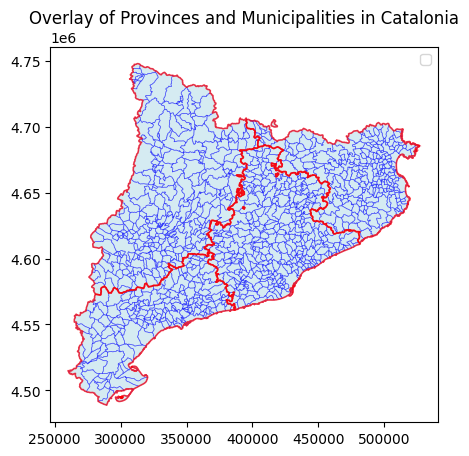

In [ ]:
maps = dir_list_cat[1]
cat_maps[ids[maps]] = gpd.read_file("../data/divisions-administratives/"+maps, crs="EPSG:4326")
mncps = cat_maps[ids[maps]]


maps = dir_list_cat[3]
cat_maps[ids[maps]] = gpd.read_file("../data/divisions-administratives/"+maps, crs="EPSG:4326")
prvncs = cat_maps[ids[maps]]
# Plot both layers on the same axes
fig, ax = plt.subplots(figsize=(5, 5))

# Plot municipalities with one color and transparency
mncps.plot(ax=ax, color='lightblue', edgecolor='blue', linewidth=0.5, alpha=0.5, label="Municipalities")

# Plot provinces with a different color and transparency
prvncs.plot(ax=ax, color='none', edgecolor='red', linewidth=1.2, alpha=0.7, label="Provinces")

# Customize and show the plot
plt.title("Overlay of Provinces and Municipalities in Catalonia")
plt.legend()
plt.show()

In [23]:
mncps.NOMMUNI

0      Abella de la Conca
1                  Abrera
2                    Àger
3                Agramunt
4      Aguilar de Segarra
              ...        
942               Vinaixa
943               Vinebre
944    Vinyols i els Arcs
945     Viver i Serrateix
946                 Xerta
Name: NOMMUNI, Length: 947, dtype: object

comarques


,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.8597,"POLYGON ((373020.449 4590188.741, 372482.744 4..."
1,02,Alt Empordà,Figueres,1356.9070,"MULTIPOLYGON (((513760.140 4662388.220, 513758..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5548,"POLYGON ((386593.300 4595896.200, 388616.100 4..."
3,04,Alt Urgell,la Seu d'Urgell,1446.6689,"MULTIPOLYGON (((360800.100 4649174.000, 360624..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4..."


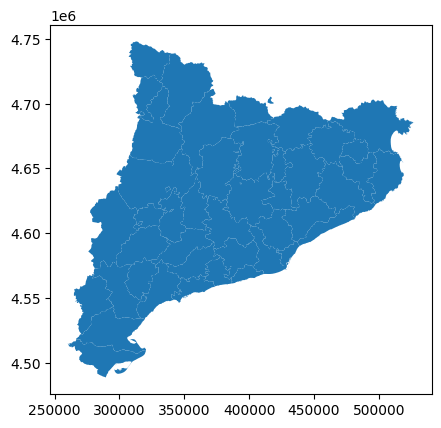






municipis


,CODIMUNI,NOMMUNI,CAPMUNI,AREAM5000,CODICOMAR,NOMCOMAR,CAPCOMAR,CODIVEGUE,NOMVEGUE,CAPVEGUE,CODIPROV,NOMPROV,CAPPROV,geometry
0,250019,Abella de la Conca,Abella de la Conca,78.1235,25,Pallars Jussà,Tremp,06,Alt Pirineu,*,25,Lleida,Lleida,"POLYGON ((346712.091 4676851.376, 347046.795 4..."
1,080018,Abrera,Abrera,19.9781,11,Baix Llobregat,Sant Feliu de Llobregat,01,Barcelona,Barcelona,08,Barcelona,Barcelona,"POLYGON ((410315.500 4598888.500, 410888.800 4..."
2,250024,Àger,Àger,160.2026,23,Noguera,Balaguer,03,Lleida,Lleida,25,Lleida,Lleida,"POLYGON ((308157.549 4660767.518, 308220.898 4..."
3,250030,Agramunt,Agramunt,79.3595,38,Urgell,Tàrrega,03,Lleida,Lleida,25,Lleida,Lleida,"MULTIPOLYGON (((342659.900 4635474.900, 343006..."
4,080023,Aguilar de Segarra,Aguilar de Segarra,43.2198,07,Bages,Manresa,07,Catalunya Central,*,08,Barcelona,Barcelona,"POLYGON ((385155.746 4625034.736, 385288.746 4..."


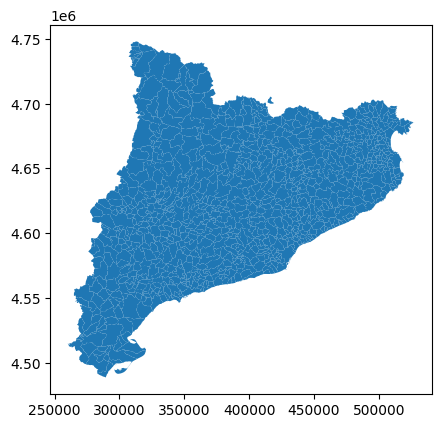






vegueries


,CODIVEGUE,NOMVEGUE,CAPVEGUE,AREAV5000,geometry
0,06,Alt Pirineu,*,5142.521823,"MULTIPOLYGON (((360800.100 4649174.000, 360624..."
1,01,Barcelona,Barcelona,2350.158393,"MULTIPOLYGON (((430778.171 4576611.283, 430743..."
2,04,Camp de Tarragona,Tarragona,2703.327145,"MULTIPOLYGON (((335047.090 4547015.090, 335000..."
3,07,Catalunya Central,*,5216.877361,"MULTIPOLYGON (((371355.616 4611241.896, 371360..."
4,02,Girona,Girona,5581.600761,"MULTIPOLYGON (((482690.024 4613155.364, 482688..."


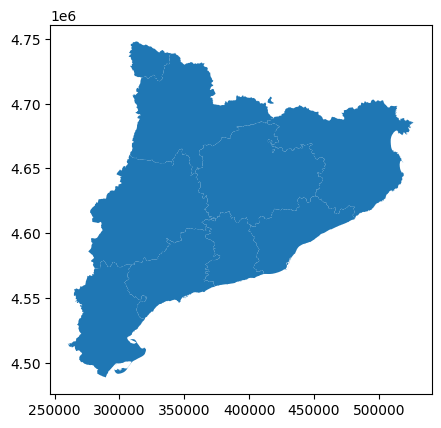






provincies


,CODIPROV,NOMPROV,CAPPROV,AREAP5000,geometry
0,08,Barcelona,Barcelona,7730.5539,"MULTIPOLYGON (((386882.634 4561236.608, 386883..."
1,17,Girona,Girona,5902.3838,"MULTIPOLYGON (((482690.024 4613155.364, 482688..."
2,25,Lleida,Lleida,12165.6973,"MULTIPOLYGON (((393371.457 4638570.630, 393374..."
3,43,Tarragona,Tarragona,6305.9500,"MULTIPOLYGON (((300644.450 4494148.850, 300643..."


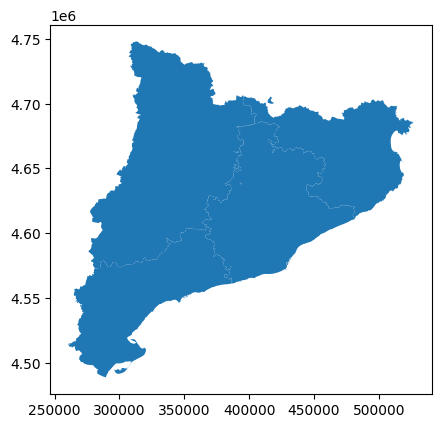






catalunya


,NOMCAT,CAPCAT,AREACA5000,geometry
0,Catalunya,Barcelona,32104.585,"MULTIPOLYGON (((300644.450 4494148.850, 300643..."


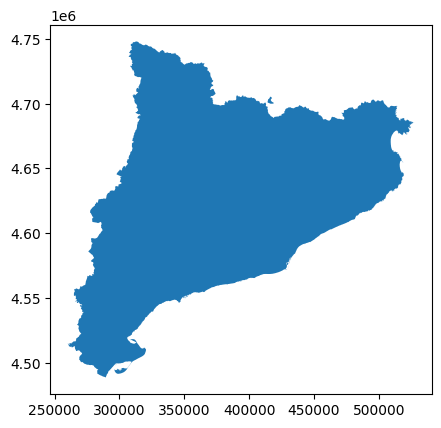

In [8]:
cat_maps = {}
for maps in dir_list_cat:
    cat_maps[ids[maps]] = gpd.read_file("../data/divisions-administratives/"+maps, crs="EPSG:4326")
    print(ids[maps])
    display(cat_maps[ids[maps]].head())
    cat_maps[ids[maps]].plot()
    plt.show()
    print("\n\n\n\n")